<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">
 
# Natural Language Processing
 
_Authors: Kiefer Katovich (San Francisco), Joseph Nelson (Washington, D.C.)_
 
---


### Learning Objectives
- Discuss the major tasks involved with natural language processing.
- Discuss, on a low level, the components of natural language processing.
- Identify why natural language processing is difficult.
- Demonstrate text classification.
- Demonstrate common text preprocessing techniques.

<a id='textblob_install'></a>

### Install TextBlob

The TextBlob Python library provides a simplified interface for exploring common NLP tasks including part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

To proceed with the lesson, first install TextBlob, as explained below. We tend to prefer Anaconda-based installations, since they tend to be tested with our other Anaconda packages.

**To install textblob run:**

> `conda install -c conda-forge textblob`

**Or:**

> `pip install textblob`

> `python -m textblob.download_corpora lite`

In [301]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB         # Naive Bayes
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import datasets
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
import nltk
#nltk.download('punkt')
#nltk.download('wordnet')

%matplotlib inline

## So Far The Data We have Has Been Numerical or Categorical

In [302]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### But What if Have Text Data Like Restaurant Reviews

In [303]:
path = r'./data/yelp.csv'
yelp = pd.read_csv(path)
yelp[['stars', 'text']].head()

,stars,text
0,5,My wife took me here on my birthday for breakf...
1,5,I have no idea why some people give bad review...
2,4,love the gyro plate. Rice is so good and I als...
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,5,General Manager Scott Petello is a good egg!!!...


In [304]:
yelp.text[0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

### The Goal Is to Represent Text With Numbers While Capturing As Much Information As Possible
### This Natural Language Processing (NLP)

### NLP Enables a New Set Of Use Cases


- **Chatbots:** Understand natural language from the user and return intelligent responses.
    - [Api.ai](https://api.ai/)
- **Information retrieval:** Find relevant results and similar results.
    - [Google](https://www.google.com/)    
- **Information extraction:** Structured information from unstructured documents.
    - [Events from Gmail](https://support.google.com/calendar/answer/6084018?hl=en)
- **Machine translation:** One language to another.
    - [Google Translate](https://translate.google.com/)
- **Text simplification:** Preserve the meaning of text, but simplify the grammar and vocabulary.
    - [Rewordify](https://rewordify.com/)
    - [Simple English Wikipedia](https://simple.wikipedia.org/wiki/Main_Page)
- **Predictive text input:** Faster or easier typing.
    - [Phrase completion application](https://justmarkham.shinyapps.io/textprediction/)
    - [A much better application](https://farsite.shinyapps.io/swiftkey-cap/)
- **Sentiment analysis:** Attitude of speaker.
    - [Hater News](https://medium.com/@KevinMcAlear/building-hater-news-62062c58325c)
- **Automatic summarization:** Extractive or abstractive summarization.
    - [autotldr](https://www.reddit.com/r/technology/comments/35brc8/21_million_people_still_use_aol_dialup/cr2zzj0)
- **Natural language generation:** Generate text from data.
    - [How a computer describes a sports match](http://www.bbc.com/news/technology-34204052)
    - [Publishers withdraw more than 120 gibberish papers](http://www.nature.com/news/publishers-withdraw-more-than-120-gibberish-papers-1.14763)
- **Speech recognition and generation:** Speech-to-text, text-to-speech.
    - [Google's Web Speech API demo](https://www.google.com/intl/en/chrome/demos/speech.html)
    - [Vocalware Text-to-Speech demo](https://www.vocalware.com/index/demo)
- **Question answering:** Determine the intent of the question, match query with knowledge base, evaluate hypotheses.
    - [How did supercomputer Watson beat Jeopardy champion Ken Jennings?](http://blog.ted.com/how-did-supercomputer-watson-beat-jeopardy-champion-ken-jennings-experts-discuss/)
    - [IBM's Watson Trivia Challenge](http://www.nytimes.com/interactive/2010/06/16/magazine/watson-trivia-game.html)
    - [The AI Behind Watson](http://www.aaai.org/Magazine/Watson/watson.php)

### These Higher Level Use Cases Stem From Foundational Concepts
<b> Which we will go over today </b>


- Text Vectorization: representing text into numbers
- N-Gram: what is considered a 
- Stop Words:
- Stemming & Lemmatization

## One Caveat:

### NLP is Generaly Hard. Why?


Natural language processing requires an understanding of the language and the world. <br>
Several limitations of NLP are:

- **Ambiguity**:
    - Hospitals Are Sued by 7 Foot Doctors
    - Juvenile Court to Try Shooting Defendant
    - Local High School Dropouts Cut in Half
- **Non-standard English:** text messages
- **Idioms:** "throw in the towel"
- **Newly coined words:** "retweet"
- **Tricky entity names:** "Where is A Bug's Life playing?"
- **World knowledge:** "Mary and Sue are sisters", "Mary and Sue are mothers"



<b> Although we can capture as much of the text's information through numbers, some of it get's lost.

# Code Along:

<b>Challenge: </b> <br>
Can You Predict A Positive or Negative Yelp Review Based on the Text?

In [305]:
path = r'./data/yelp.csv'
yelp = pd.read_csv(path)
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


Some NLP Terms: 
- **document**: one row of text (in this case one review)
- **corpus**: a collection of documents (in this case all of the reviews)


In [306]:
# Create a new DataFrame that only contains the 5-star and 1-star reviews.
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]


In [307]:

# Define X and y.
X = yelp_best_worst.text
y = yelp_best_worst.stars


In [308]:

# Split the new DataFrame into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [309]:
# The head of the original data
yelp_best_worst[['stars', 'text']].head()

,stars,text
0,5,My wife took me here on my birthday for breakf...
1,5,I have no idea why some people give bad review...
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!..."
4,5,General Manager Scott Petello is a good egg!!!...
6,5,Drop what you're doing and drive here. After I...


### Text Classification

Text classification is done in the same way as all other classification models. 

- First, the text is vectorized into a set of numeric features. 
- Then, a standard machine learning classifier is applied. 
- NLP libraries often include vectorizers and ML models that work particularly well with text.


**Text classification is the task of predicting which category or topic a text sample is from.**

We may want to identify:
- Is an article a sports or business story?
- Does an email have positive or negative sentiment?
- Is the rating of a recipe 1, 2, 3, 4, or 5 stars?

**Predictions are often made by using the words as features and the label as the target output.**



### a. Text Vectorization

We will represent our text numerically using the <b>bag of words model.</b>

It is called bag of words because the document's structure is lost — as if the words are all jumbled up in a bag.
The first step to creating a bag-of-words model is to create a vocabulary of all possible words in the corpora.


Bag of words means uses:
- a vocabulary of known words
- a measure of presense of the words

##### Examples:

![DTM](images/nlp_viz.png)

![DTM](images/DTM.png)

##### Using Scikit Learn to Vectorize Yelp Reviews

In [310]:
# instantiate
vect = CountVectorizer()

In [311]:
X_train.head()

6841    FILLY-B's!!!!!  only 8 reviews?? NINE now!!!\n...
1728    My husband and I absolutely LOVE this restaura...
3853    We went today after lunch. I got my usual of l...
671     Totally dissapointed.  I had purchased a coupo...
4920    Costco Travel - My husband and I recently retu...
Name: text, dtype: object

In [312]:
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [313]:
# Rows are documents, columns are terms (aka "tokens" or "features", individual words in this situation).
X_train_dtm.shape

(3064, 16825)

#### The Vocabulary

In [314]:
# First 50 features
print((vect.get_feature_names()[:50]))

['00', '000', '00a', '00am', '00pm', '01', '02', '03', '03342', '04', '05', '06', '07', '09', '0buxoc0crqjpvkezo3bqog', '0l', '10', '100', '1000', '1000x', '1001', '100th', '101', '102', '105', '1070', '108', '10am', '10ish', '10min', '10mins', '10minutes', '10pm', '10th', '10x', '11', '110', '1100', '111', '111th', '112', '115th', '118', '11a', '11am', '11p', '11pm', '12', '120', '128i']


In [315]:
# Last 50 features
print((vect.get_feature_names()[-50:]))

['yyyyy', 'z11', 'za', 'zabba', 'zach', 'zam', 'zanella', 'zankou', 'zappos', 'zatsiki', 'zen', 'zero', 'zest', 'zexperience', 'zha', 'zhou', 'zia', 'zihuatenejo', 'zilch', 'zin', 'zinburger', 'zinburgergeist', 'zinc', 'zinfandel', 'zing', 'zip', 'zipcar', 'zipper', 'zippers', 'zipps', 'ziti', 'zoe', 'zombi', 'zombies', 'zone', 'zones', 'zoning', 'zoo', 'zoyo', 'zucca', 'zucchini', 'zuchinni', 'zumba', 'zupa', 'zuzu', 'zwiebel', 'zzed', 'éclairs', 'école', 'ém']


In [316]:
len(vect.get_feature_names())

16825

#### The Measure Of Presense
In this case count

In [317]:
X_train_dtm

<3064x16825 sparse matrix of type '<class 'numpy.int64'>'
	with 237720 stored elements in Compressed Sparse Row format>

In [318]:
 pd.DataFrame(X_train_dtm.todense()[21][-50:], columns=vect.get_feature_names())

,00,000,00a,00am,00pm,01,02,03,03342,04,...,zucchini,zuchinni,zumba,zupa,zuzu,zwiebel,zzed,éclairs,école,ém
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Count Vectorizer Hyper Parameters

In [319]:
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

### b. Remove Words in Vocabulary That Are to Be Very Rare or Very Common

In [320]:
pd.DataFrame(X_train_dtm.todense(), columns=vect.get_feature_names()).shape

(3064, 16825)

In [321]:
pd.DataFrame(X_train_dtm.todense(), columns=vect.get_feature_names())['is'].sum()

5160

In [322]:
pd.DataFrame(X_train_dtm.todense(), columns=vect.get_feature_names())['000'].sum()

9

#### We Can Eliminate These Very Common Words Using Count Vectorizer's Stop Words Hyper Parameter

These extremely common words & non predictive words are called <b> Stop Words </b>
    
By removing them we save in performance costs, and since they are so frequent we lower their influence within the model 

In [323]:
# instantiate
vect = CountVectorizer(stop_words='english')


X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [324]:
'is' in vect.get_feature_names()

False

In [325]:
pd.DataFrame(X_train_dtm.todense(), columns=vect.get_feature_names()).shape

(3064, 16528)

<b> Example Of Stop Words

In [326]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
list(stop_words)

['ie',
 'over',
 'where',
 'eg',
 'him',
 'eight',
 'nowhere',
 'wherein',
 'less',
 'show',
 'anyhow',
 'six',
 'ever',
 'put',
 'system',
 'sincere',
 'there',
 'others',
 'sixty',
 'neither',
 'serious',
 're',
 'very',
 'latter',
 'which',
 'namely',
 'whom',
 'back',
 'latterly',
 'fifty',
 'your',
 'whether',
 'often',
 'in',
 'becoming',
 'we',
 'along',
 'un',
 'sometimes',
 'me',
 'being',
 'done',
 'must',
 'another',
 'until',
 'hers',
 'else',
 'inc',
 'its',
 'towards',
 'five',
 'down',
 'his',
 'name',
 'meanwhile',
 'both',
 'above',
 'off',
 'himself',
 'onto',
 'beyond',
 'several',
 'toward',
 'amount',
 'move',
 'am',
 'elsewhere',
 'sometime',
 'ten',
 'whole',
 'become',
 'anyone',
 'besides',
 'much',
 'their',
 'around',
 'whose',
 'mostly',
 'should',
 'to',
 'mill',
 'so',
 'three',
 'seem',
 'least',
 'before',
 'again',
 'will',
 'can',
 'co',
 'get',
 'each',
 'than',
 'her',
 'up',
 'everyone',
 'how',
 'nine',
 'either',
 'yourself',
 'thereby',
 'seems',

### Classification V1:

- Count Vectorizer
- Stop Words Removed

In [327]:
from sklearn.ensemble import RandomForestClassifier

In [328]:
# Use default options for CountVectorizer.
vect = CountVectorizer()

# Create document-term matrices.
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# Use Naive Bayes to predict the star rating.
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train_dtm, y_train)
y_pred_class = rf.predict(X_test_dtm)

# Calculate accuracy.
print((metrics.accuracy_score(y_test, y_pred_class)))

/Users/fernandohidalgo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8874755381604696


In [329]:
print(metrics.classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           1       0.84      0.46      0.60       184
           5       0.89      0.98      0.93       838

   micro avg       0.89      0.89      0.89      1022
   macro avg       0.87      0.72      0.77      1022
weighted avg       0.88      0.89      0.87      1022



In [330]:
# Calculate null accuracy.
y_test_binary = np.where(y_test==5, 1, 0) # five stars become 1, one stars become 0
print('Percent 5 Stars:', y_test_binary.mean())
print('Percent 1 Stars:', 1 - y_test_binary.mean())

Percent 5 Stars: 0.8199608610567515
Percent 1 Stars: 0.18003913894324852


Text(0.5, 0, 'actual')

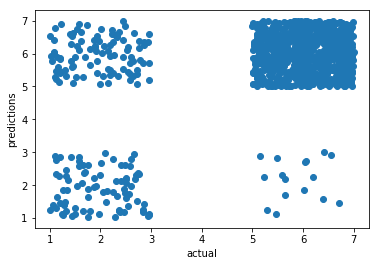

In [331]:
import matplotlib.pyplot as plt
np.random.seed(19680801)

plt.scatter(y_test + 2*np.random.rand(len(y_test)), y_pred_class + 2*np.random.rand(len(y_pred_class)))
plt.ylabel('predictions')
plt.xlabel('actual')

### Classification V2:

- Count Vectorizer
- Stop Words Removed

In [332]:
# Use default options for CountVectorizer.
vect = CountVectorizer(stop_words='english')

# Create document-term matrices.
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# Use Naive Bayes to predict the star rating.
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train_dtm, y_train)
y_pred_class = rf.predict(X_test_dtm)

# Calculate accuracy.
print((metrics.accuracy_score(y_test, y_pred_class)))

/Users/fernandohidalgo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.898238747553816


In [333]:
print(metrics.classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           1       0.84      0.54      0.66       184
           5       0.91      0.98      0.94       838

   micro avg       0.90      0.90      0.90      1022
   macro avg       0.87      0.76      0.80      1022
weighted avg       0.89      0.90      0.89      1022



### Very Rare Words Should Also Be Removed


Since they are so rare, their relationships with other words can be by chance

In [334]:
# Use default options for CountVectorizer.
vect = CountVectorizer(stop_words='english', min_df=15) #Words have to appear more than 15 times in document

# Create document-term matrices.
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)



In [335]:
X_train_dtm.shape

(3064, 1718)

In [336]:
vect.get_feature_names()

['00',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '20',
 '24',
 '25',
 '30',
 '40',
 '45',
 '50',
 '60',
 '90',
 '95',
 '99',
 'able',
 'absolute',
 'absolutely',
 'accommodating',
 'actual',
 'actually',
 'add',
 'added',
 'adding',
 'addition',
 'admit',
 'adorable',
 'advantage',
 'advice',
 'afford',
 'affordable',
 'afternoon',
 'age',
 'ago',
 'agree',
 'ahead',
 'air',
 'airport',
 'alcohol',
 'allow',
 'allowed',
 'alright',
 'amazing',
 'amazingly',
 'ambiance',
 'american',
 'anniversary',
 'annoying',
 'answer',
 'anymore',
 'anyways',
 'apart',
 'apologized',
 'apparently',
 'appears',
 'appetizer',
 'appetizers',
 'apple',
 'appointment',
 'appreciate',
 'appreciated',
 'area',
 'areas',
 'aren',
 'arizona',
 'arrive',
 'arrived',
 'art',
 'artichoke',
 'asada',
 'asian',
 'ask',
 'asked',
 'asking',
 'asparagus',
 'ass',
 'asu',
 'ate',
 'atmosphere',
 'attended',
 'attention',
 'attentive',
 'attitude',
 'authentic',
 'available',
 'ave',
 'a

### Classification V3: 

- Count Vectorizer
- Stop words
- Minimum Occurance in DataFrame

In [337]:
# Use default options for CountVectorizer.
vect = CountVectorizer(stop_words='english', min_df=15) #Words have to appear more than 15 times in document

# Create document-term matrices.
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)


rf = RandomForestClassifier(random_state=10)
rf.fit(X_train_dtm, y_train)
y_pred_class = rf.predict(X_test_dtm)

# Calculate accuracy.
print((metrics.accuracy_score(y_test, y_pred_class)))

0.8904109589041096


/Users/fernandohidalgo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [338]:
### Recap:



## c. We Can Add Combinations of Words via Ngrams

For Example: <br>

Data Scientist has additional meaning than data and scientist.

N-grams are features which consist of N consecutive words. This is useful because using the bag-of-words model, treating `data scientist` as a single feature has more meaning than having two independent features `data` and `scientist`!

Example:
```
my cat is awesome
Unigrams (1-grams): 'my', 'cat', 'is', 'awesome'
Bigrams (2-grams): 'my cat', 'cat is', 'is awesome'
Trigrams (3-grams): 'my cat is', 'cat is awesome'
4-grams: 'my cat is awesome'
```

- **ngram_range:** tuple (min_n, max_n)
- The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.


In [339]:
# Include 1-grams and 2-grams.
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(3064, 16825)

In [340]:
# Include 1-grams and 2-grams.
vect = CountVectorizer(ngram_range=(1, 2))
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(3064, 169847)

In [341]:
vect.get_feature_names()[-20:]

['zumba',
 'zumba class',
 'zumba or',
 'zumba yogalates',
 'zupa',
 'zupa flavors',
 'zuzu',
 'zuzu in',
 'zuzu is',
 'zuzu the',
 'zwiebel',
 'zwiebel kräuter',
 'zzed',
 'zzed in',
 'éclairs',
 'éclairs napoleons',
 'école',
 'école lenôtre',
 'ém',
 'ém all']

<b>Note: <br></b>
Although we sometimes add important new features that have meaning such as `data scientist`, many of the new features will just be noise. So, particularly if we do not have much data, adding n-grams can actually decrease model performance. This is because if each n-gram is only present once or twice in the training set, we are effectively adding mostly noisy features to the mix.

### Classification V4: 

- Count Vectorizer
- Stop words
- Minimum Occurance in DataFrame
- Include Bi-grams

In [342]:
# Use default options for CountVectorizer.
vect = CountVectorizer(stop_words='english', 
                       min_df=15,
                      ngram_range=(1, 2)) #Words have to appear more than 15 times in document

# Create document-term matrices.
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)


rf = RandomForestClassifier(random_state=10)
rf.fit(X_train_dtm, y_train)
y_pred_class = rf.predict(X_test_dtm)

# Calculate accuracy.
print((metrics.accuracy_score(y_test, y_pred_class)))

0.8933463796477495


/Users/fernandohidalgo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### We Can Also Limit the Max Number Of Features Available

It only limits the most frequently occuring

In [343]:
# Remove English stop words and only keep 100 features.
vect = CountVectorizer(stop_words='english', 
                       ngram_range=(1,2),
                       max_features=100)
X_train_dtm = vect.fit_transform(X_train)

In [344]:
X_train_dtm.shape

(3064, 100)

### Classification V5: 

- Count Vectorizer
- Stop words
- Minimum Occurance in DataFrame
- Include Bi-grams
- Limit Number Of Words to 400

In [345]:
def tokenize_test(vect):
    X_train_dtm = vect.fit_transform(X_train)
    print(('Features: ', X_train_dtm.shape[1]))
    X_test_dtm = vect.transform(X_test)
    nb = RandomForestClassifier()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    print(('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class)))

In [346]:
vect = CountVectorizer(stop_words='english', 
                       ngram_range=(1,2),
                       max_features=3000)

# Create document-term matrices.
tokenize_test(vect)

('Features: ', 3000)
('Accuracy: ', 0.8962818003913894)


/Users/fernandohidalgo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Just like with all other models, more features does not mean a better model. So, we must tune our feature generator to remove features whose predictive capability is none or very low.

In this case, we have increased included by grams and capped the number of features to 1,000

In [347]:
vect = CountVectorizer(stop_words='english',
                       max_features=3000)

# Create document-term matrices.
tokenize_test(vect)

('Features: ', 3000)
('Accuracy: ', 0.8992172211350293)


/Users/fernandohidalgo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## d. Combining Tenses of The Same Word

We want to include words that have the same meaning but have different tenses.

Running, ran, run -> Run

Chairs, Chair -> Chair

### We Do This Via: Stemming and Lemmatization

<b> i. Stemming is a crude process of removing common endings from sentences, such as "s", "es", "ly", "ing", and "ed". </b>

- **What:** Reduce a word to its base/stem/root form.
- **Why:** This intelligently reduces the number of features by grouping together (hopefully) related words.
- **Notes:**
    - Stemming uses a simple and fast rule-based approach.
    - Stemmed words are usually not shown to users (used for analysis/indexing).
    - Some search engines treat words with the same stem as synonyms.
    
    
<b> ii. Lemmatization is a more refined process that uses specific language and grammar rules to derive the root of a word. </b>  

This is useful for words that do not share an obvious root such as "better" and "best".

- **What:** Lemmatization derives the canonical form ("lemma") of a word.
- **Why:** It can be better than stemming.
- **Notes:** Uses a dictionary-based approach (slower than stemming).

##### Application With Text Blob

In [348]:
review = TextBlob(yelp_best_worst.text[1])

In [349]:
type(review)

textblob.blob.TextBlob

In [350]:
review.detect_language()

'en'

In [351]:
review.sentiment[0]

0.22977272727272727

In [352]:
review.words

WordList(['I', 'have', 'no', 'idea', 'why', 'some', 'people', 'give', 'bad', 'reviews', 'about', 'this', 'place', 'It', 'goes', 'to', 'show', 'you', 'you', 'can', 'please', 'everyone', 'They', 'are', 'probably', 'griping', 'about', 'something', 'that', 'their', 'own', 'fault', 'there', 'are', 'many', 'people', 'like', 'that', 'In', 'any', 'case', 'my', 'friend', 'and', 'I', 'arrived', 'at', 'about', '5:50', 'PM', 'this', 'past', 'Sunday', 'It', 'was', 'pretty', 'crowded', 'more', 'than', 'I', 'thought', 'for', 'a', 'Sunday', 'evening', 'and', 'thought', 'we', 'would', 'have', 'to', 'wait', 'forever', 'to', 'get', 'a', 'seat', 'but', 'they', 'said', 'we', "'ll", 'be', 'seated', 'when', 'the', 'girl', 'comes', 'back', 'from', 'seating', 'someone', 'else', 'We', 'were', 'seated', 'at', '5:52', 'and', 'the', 'waiter', 'came', 'and', 'got', 'our', 'drink', 'orders', 'Everyone', 'was', 'very', 'pleasant', 'from', 'the', 'host', 'that', 'seated', 'us', 'to', 'the', 'waiter', 'to', 'the', 'ser

In [353]:
review.sentences

[Sentence("I have no idea why some people give bad reviews about this place."),
 Sentence("It goes to show you, you can please everyone."),
 Sentence("They are probably griping about something that their own fault...there are many people like that."),
 Sentence("In any case, my friend and I arrived at about 5:50 PM this past Sunday."),
 Sentence("It was pretty crowded, more than I thought for a Sunday evening and thought we would have to wait forever to get a seat but they said we'll be seated when the girl comes back from seating someone else."),
 Sentence("We were seated at 5:52 and the waiter came and got our drink orders."),
 Sentence("Everyone was very pleasant from the host that seated us to the waiter to the server."),
 Sentence("The prices were very good as well."),
 Sentence("We placed our orders once we decided what we wanted at 6:02."),
 Sentence("We shared the baked spaghetti calzone and the small "Here's The Beef" pizza so we can both try them."),
 Sentence("The calzone wa

##### i. Stemming

In [354]:
review.words

WordList(['I', 'have', 'no', 'idea', 'why', 'some', 'people', 'give', 'bad', 'reviews', 'about', 'this', 'place', 'It', 'goes', 'to', 'show', 'you', 'you', 'can', 'please', 'everyone', 'They', 'are', 'probably', 'griping', 'about', 'something', 'that', 'their', 'own', 'fault', 'there', 'are', 'many', 'people', 'like', 'that', 'In', 'any', 'case', 'my', 'friend', 'and', 'I', 'arrived', 'at', 'about', '5:50', 'PM', 'this', 'past', 'Sunday', 'It', 'was', 'pretty', 'crowded', 'more', 'than', 'I', 'thought', 'for', 'a', 'Sunday', 'evening', 'and', 'thought', 'we', 'would', 'have', 'to', 'wait', 'forever', 'to', 'get', 'a', 'seat', 'but', 'they', 'said', 'we', "'ll", 'be', 'seated', 'when', 'the', 'girl', 'comes', 'back', 'from', 'seating', 'someone', 'else', 'We', 'were', 'seated', 'at', '5:52', 'and', 'the', 'waiter', 'came', 'and', 'got', 'our', 'drink', 'orders', 'Everyone', 'was', 'very', 'pleasant', 'from', 'the', 'host', 'that', 'seated', 'us', 'to', 'the', 'waiter', 'to', 'the', 'ser

In [355]:
stemmer = SnowballStemmer('english')

# Stem each word.
print([stemmer.stem(word) for word in review.words])

['i', 'have', 'no', 'idea', 'whi', 'some', 'peopl', 'give', 'bad', 'review', 'about', 'this', 'place', 'it', 'goe', 'to', 'show', 'you', 'you', 'can', 'pleas', 'everyon', 'they', 'are', 'probabl', 'gripe', 'about', 'someth', 'that', 'their', 'own', 'fault', 'there', 'are', 'mani', 'peopl', 'like', 'that', 'in', 'ani', 'case', 'my', 'friend', 'and', 'i', 'arriv', 'at', 'about', '5:50', 'pm', 'this', 'past', 'sunday', 'it', 'was', 'pretti', 'crowd', 'more', 'than', 'i', 'thought', 'for', 'a', 'sunday', 'even', 'and', 'thought', 'we', 'would', 'have', 'to', 'wait', 'forev', 'to', 'get', 'a', 'seat', 'but', 'they', 'said', 'we', 'll', 'be', 'seat', 'when', 'the', 'girl', 'come', 'back', 'from', 'seat', 'someon', 'els', 'we', 'were', 'seat', 'at', '5:52', 'and', 'the', 'waiter', 'came', 'and', 'got', 'our', 'drink', 'order', 'everyon', 'was', 'veri', 'pleasant', 'from', 'the', 'host', 'that', 'seat', 'us', 'to', 'the', 'waiter', 'to', 'the', 'server', 'the', 'price', 'were', 'veri', 'good',

In [356]:
stemmer.stem('chairs')

'chair'

In [357]:
stemmer.stem('running')

'run'

In [358]:
stemmer.stem('runs')

'run'

In [359]:
stemmer.stem('ran')

'ran'

##### ii. Lemmatization

In [360]:
review.words

WordList(['I', 'have', 'no', 'idea', 'why', 'some', 'people', 'give', 'bad', 'reviews', 'about', 'this', 'place', 'It', 'goes', 'to', 'show', 'you', 'you', 'can', 'please', 'everyone', 'They', 'are', 'probably', 'griping', 'about', 'something', 'that', 'their', 'own', 'fault', 'there', 'are', 'many', 'people', 'like', 'that', 'In', 'any', 'case', 'my', 'friend', 'and', 'I', 'arrived', 'at', 'about', '5:50', 'PM', 'this', 'past', 'Sunday', 'It', 'was', 'pretty', 'crowded', 'more', 'than', 'I', 'thought', 'for', 'a', 'Sunday', 'evening', 'and', 'thought', 'we', 'would', 'have', 'to', 'wait', 'forever', 'to', 'get', 'a', 'seat', 'but', 'they', 'said', 'we', "'ll", 'be', 'seated', 'when', 'the', 'girl', 'comes', 'back', 'from', 'seating', 'someone', 'else', 'We', 'were', 'seated', 'at', '5:52', 'and', 'the', 'waiter', 'came', 'and', 'got', 'our', 'drink', 'orders', 'Everyone', 'was', 'very', 'pleasant', 'from', 'the', 'host', 'that', 'seated', 'us', 'to', 'the', 'waiter', 'to', 'the', 'ser

In [361]:
print([word.lemmatize() for word in review.words])

['I', 'have', 'no', 'idea', 'why', 'some', 'people', 'give', 'bad', 'review', 'about', 'this', 'place', 'It', 'go', 'to', 'show', 'you', 'you', 'can', 'please', 'everyone', 'They', 'are', 'probably', 'griping', 'about', 'something', 'that', 'their', 'own', 'fault', 'there', 'are', 'many', 'people', 'like', 'that', 'In', 'any', 'case', 'my', 'friend', 'and', 'I', 'arrived', 'at', 'about', '5:50', 'PM', 'this', 'past', 'Sunday', 'It', 'wa', 'pretty', 'crowded', 'more', 'than', 'I', 'thought', 'for', 'a', 'Sunday', 'evening', 'and', 'thought', 'we', 'would', 'have', 'to', 'wait', 'forever', 'to', 'get', 'a', 'seat', 'but', 'they', 'said', 'we', "'ll", 'be', 'seated', 'when', 'the', 'girl', 'come', 'back', 'from', 'seating', 'someone', 'else', 'We', 'were', 'seated', 'at', '5:52', 'and', 'the', 'waiter', 'came', 'and', 'got', 'our', 'drink', 'order', 'Everyone', 'wa', 'very', 'pleasant', 'from', 'the', 'host', 'that', 'seated', 'u', 'to', 'the', 'waiter', 'to', 'the', 'server', 'The', 'pri

In [362]:
TextBlob('ran').words[0].lemmatize(pos = 'v')

'run'

In [363]:
TextBlob('liked').words[0].lemmatize(pos = 'v')

'like'

In [364]:
TextBlob('was').words[0].lemmatize(pos = 'v')

'be'

In [365]:
TextBlob('were').words[0].lemmatize(pos = 'v')

'be'

**More Lemmatization and Stemming Examples**

|Lemmatization|Stemming|
|-------------|---------|
|shouted → shout|badly → bad|
|was → be|computing → comput|
|were → be|computed → comput|
|wiping → wipe|wiped → wip|
|hidden → hide|wiping → wip|

##### Applying Lemmatization

In [366]:
def split_into_lemmas(text):
    text = str(text).lower()
    words = TextBlob(text).words
    return [word.lemmatize() for word in words]

### Classification V6


- Count Vectorizer
- Stop words
- Minimum Occurance in DataFrame
- Include Bi-grams
- Limit Number Of Words to 400
- Lemmatizing words

In [367]:
vect = CountVectorizer(analyzer=split_into_lemmas)
tokenize_test(vect)

('Features: ', 16444)
('Accuracy: ', 0.8610567514677103)


/Users/fernandohidalgo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [368]:
vect = CountVectorizer(analyzer=split_into_lemmas,
                        stop_words='english')

# Create document-term matrices.
tokenize_test(vect)

('Features: ', 16444)
('Accuracy: ', 0.8659491193737769)


/Users/fernandohidalgo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### e. Term Frequency–Inverse Document Frequency (TF–IDF)

Currently the measure of presense of the words has been the counts of words.

But what if a word is very common among all the documents?

If we were to use use NYT data during the election, Trump would appear very frequently.

Two possible solutions:
- Add Trump as a stop word
- Calculate the difference between a word's occurance between a document to the corpus


- **What:** Term frequency–inverse document frequency (TF–IDF) computes the "relative frequency" with which a word appears in a document, compared to its frequency across all documents.
- **Why:** It's more useful than "term frequency" for identifying "important" words in each document (high frequency in that document, low frequency in other documents).
- **Notes:** It's used for search-engine scoring, text summarization, and document clustering.

In [369]:
#TFIDF Example

In [370]:
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [371]:
### Occurance Across Documents

vect = CountVectorizer()
tf = pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())
tf

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [372]:
### Occurances between the corpus (all documents)
vect = CountVectorizer()
df = vect.fit_transform(simple_train).toarray().sum(axis=0)
pd.DataFrame(df.reshape(1, 6), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,1,3,2,2,1,1


In [373]:
vect.fit_transform(simple_train).toarray()

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]], dtype=int64)

In [374]:
df

array([1, 3, 2, 2, 1, 1], dtype=int64)

In [375]:
# Term frequency–inverse document frequency (simple version)
tf/df

,cab,call,me,please,tonight,you
0,0.0,0.333333,0.0,0.0,1.0,1.0
1,1.0,0.333333,0.5,0.0,0.0,0.0
2,0.0,0.333333,0.5,1.0,0.0,0.0


Notice that if a word is very high occuring like "call" the highest value it can get per row is .33. <br>
Compared to please which get has the highest value of 1 for the third document

In [416]:
vect = TfidfVectorizer()
pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0.000000,0.385372,0.000000,0.000000,0.652491,0.652491
1,0.720333,0.425441,0.547832,0.000000,0.000000,0.000000
2,0.000000,0.266075,0.342620,0.901008,0.000000,0.000000


### Actual Calculation

![DTM](images/tf.png)

Term frequency:
- Numerator: occurances of term in document
- Denomenator: total words in document

![DTM](images/idf.png)

Inverse Document Frequency:
- log
- Numerator: N is number of documents
- Denomenator: number of documents containing the term

![DTM](images/tfidf.png)

In [451]:
vect = TfidfVectorizer()
pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0.000000,0.385372,0.000000,0.000000,0.652491,0.652491
1,0.720333,0.425441,0.547832,0.000000,0.000000,0.000000
2,0.000000,0.266075,0.342620,0.901008,0.000000,0.000000


### Classification V7


- TFIDF Vectorizer
- Stop words
- Lemmatizing words

In [377]:
vect = TfidfVectorizer(stop_words='english',
                      analyzer=split_into_lemmas)

# Fit transform Yelp data.
tokenize_test(vect)

('Features: ', 16444)


/Users/fernandohidalgo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


('Accuracy: ', 0.8767123287671232)


Why would it do worse?

## Extra Features

## Sentiment Analysis

Understanding how positive or negative a review is. There are many ways in practice to compute a sentiment value. For example:

- Have a list of "positive" words and a list of "negative" words and count how many occur in a document. 
- Train a classifier given many examples of "positive" documents and "negative" documents. 
    - Note that this technique is often just an automated way to derive the first (e.g., using bag-of-words with logistic regression, a coefficient is assigned to each word!).

For the most accurate sentiment analysis, you will want to train a custom sentiment model based on documents that are particular to your application. Generic models (such as the one we are about to use!) often do not work as well as hoped.

As we will do below, always make sure you double-check that the algorithm is working by manually verifying that scores correctly correspond to positive/negative reviews! Otherwise, you may be using numbers that are not accurate.

In [378]:
print(review)

I have no idea why some people give bad reviews about this place. It goes to show you, you can please everyone. They are probably griping about something that their own fault...there are many people like that.

In any case, my friend and I arrived at about 5:50 PM this past Sunday. It was pretty crowded, more than I thought for a Sunday evening and thought we would have to wait forever to get a seat but they said we'll be seated when the girl comes back from seating someone else. We were seated at 5:52 and the waiter came and got our drink orders. Everyone was very pleasant from the host that seated us to the waiter to the server. The prices were very good as well. We placed our orders once we decided what we wanted at 6:02. We shared the baked spaghetti calzone and the small "Here's The Beef" pizza so we can both try them. The calzone was huge and we got the smallest one (personal) and got the small 11" pizza. Both were awesome! My friend liked the pizza better and I liked the calzone

In [379]:
# Polarity ranges from -1 (most negative) to 1 (most positive).
review.sentiment.polarity

0.22977272727272727

In [380]:
TextBlob('this is the best restaurant I have ever been to').sentiment.polarity

1.0

In [381]:
TextBlob('this is the worst restaurant I have ever been to').sentiment.polarity

-1.0

In [382]:
### Mistake
TextBlob('this is not the best restaurant I have ever been to').sentiment.polarity

1.0

##### Adding Polarity as A New Feature

In [383]:
# Understanding the apply method
yelp['length'] = yelp.text.apply(len)
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889


In [384]:
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity
    #return TextBlob(text).sentiment.polarity

In [385]:
yelp['sentiment'] = yelp.text.apply(detect_sentiment)

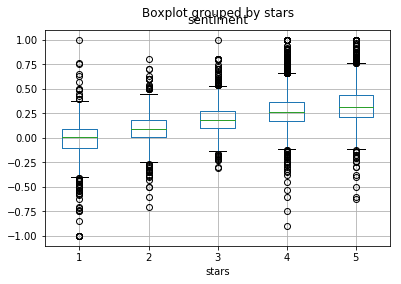

In [386]:
yelp.boxplot(column='sentiment', by='stars')

In [387]:
yelp[yelp.sentiment == 1].text.head()

254    Our server Gary was awesome. Food was amazing....
347    3 syllables for this place. \nA-MAZ-ING!\n\nTh...
420                                    LOVE the food!!!!
459    Love it!!! Wish we still lived in Arizona as C...
679                                     Excellent burger
Name: text, dtype: object

In [388]:
yelp[yelp.sentiment == -1].text.head()

773     This was absolutely horrible. I got the suprem...
1517                  Nasty workers and over priced trash
3266    Absolutely awful... these guys have NO idea wh...
4766                                       Very bad food!
5812        I wouldn't send my worst enemy to this place.
Name: text, dtype: object

In [389]:
# Negative sentiment in a 5-star review
yelp[(yelp.stars == 5) & (yelp.sentiment < -0.3)].iloc[0].text

'RIP AZ Coffee Connection.  :(  I stopped by two days ago unaware that they had closed.  I am severely bummed.  This place is irreplaceable!  Damn you, Starbucks and McDonalds!'

In [390]:
# Positive sentiment in a 1-star review
yelp[(yelp.stars == 1) & (yelp.sentiment > 0.5)].iloc[0].text

"If you like the stuck up Scottsdale vibe this is a good place for you. The food isn't impressive. Nice outdoor seating."

### Adding The New Columns

In [391]:
# Create a DataFrame that only contains the 5-star and 1-star reviews.
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

# define X and y
feature_cols = ['text', 'sentiment', 'cool', 'useful', 'funny']
X = yelp_best_worst[feature_cols]
y = yelp_best_worst.stars

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [397]:
# Use CountVectorizer with text column only.
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train.text)
X_test_dtm = vect.transform(X_test.text)
print((X_train_dtm.shape))
print((X_test_dtm.shape))

(3064, 16825)
(1022, 16825)


In [398]:
# Shape of other four feature columns
X_train.drop('text', axis=1).shape

(3064, 4)

In [399]:
# Cast other feature columns to float and convert to a sparse matrix.
extra = sp.sparse.csr_matrix(X_train.drop('text', axis=1).astype(float))
extra.shape

(3064, 4)

In [400]:
# Combine sparse matrices.
X_train_dtm_extra = sp.sparse.hstack((X_train_dtm, extra))
X_train_dtm_extra.shape

(3064, 16829)

In [401]:
# Repeat for testing set.
extra = sp.sparse.csr_matrix(X_test.drop('text', axis=1).astype(float))
X_test_dtm_extra = sp.sparse.hstack((X_test_dtm, extra))
X_test_dtm_extra.shape

(1022, 16829)

In [413]:
# Use logistic regression with text column only.
logreg = LogisticRegression()
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9256360078277887


In [414]:
# Use logistic regression with all features.
logreg = LogisticRegression()
logreg.fit(X_train_dtm_extra, y_train)
y_pred_class = logreg.predict(X_test_dtm_extra)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9373776908023483


## Bonus: Fun TextBlob Features

In [99]:
# Spelling correction
TextBlob('15 minuets late').correct()

TextBlob("15 minutes late")

In [100]:
# Spellcheck
Word('parot').spellcheck()

[('part', 0.9929478138222849), ('parrot', 0.007052186177715092)]

In [101]:
# Definitions
Word('bank').define('v')

['tip laterally',
 'enclose with a bank',
 'do business with a bank or keep an account at a bank',
 'act as the banker in a game or in gambling',
 'be in the banking business',
 'put into a bank account',
 'cover with ashes so to control the rate of burning',
 'have confidence or faith in']

In [415]:
# Language identification
TextBlob('Hola amigos').detect_language()

'es'

<a id="bayes"></a>

## Appendix: Intro to Naive Bayes and Text Classification


Earlier we experimented with text classification using a Naive Bayes model. What exactly are Naive Bayes classifiers? 

**What is Bayes?**  
Bayes, or Bayes' Theorem, is a different way to assess probability. It considers prior information in order to more accurately assess the situation.

**Example:** You are playing roulette.

As you approach the table, you see that the last number the ball landed on was Red-3. With a frequentist mindset, you know that the ball is just as likely to land on Red-3 again given that every slot on the wheel has an equal opportunity of 1 in 37.

Given that you started believing that the ball can land in each slot with an equal likelihood _and_ that you have only seen one throw previously, you rationally believe that there would be no difference between picking Red a second time now or picking Black -- ideally they would happen with the same likelihood!

However, as you sit and watch the roulette table, you begin to notice something strange. The ball is _always_ landing on red. Every single time the ball is thrown, it lands in a red slot. Even though your past beliefs stated that red and black were equally likely, every time it lands in red, you change those beliefs a little more towards a biased roulette table. 

This is what Bayes is all about — adjusting probabilities as more data is gathered!

Below is the equation for Bayes.  

$$P(A \ | \ B) = \frac {P(B \ | \ A) \times P(A)} {P(B)}$$

- **$P(A \ | \ B)$** : Probability of `Event A` occurring given `Event B` has occurred.
- **$P(B \ | \ A)$** : Probability of `Event B` occurring given `Event A` has occurred.
- **$P(A)$** : Probability of `Event A` occurring.
- **$P(B)$** : Probability of `Event B` occurring.

<a id='conclusion'></a>
## Conclusion

- NLP is a gigantic field.
- Understanding the basics broadens the types of data you can work with.
- Simple techniques go a long way.
- Use scikit-learn for NLP whenever possible.

While we used SKLearn and TextBlob today, another popular python NLP library is [Spacy](https://spacy.io).

### Application: Predict Whether A Project Will Get Funded

In [631]:
from datetime import datetime 


In [632]:
def dateparse(date_string):
    return datetime.strptime(date_string, '%Y-%m-%d %H:%M:%S')

In [633]:
df = pd.read_csv('data/donors_choose_data.csv')

In [634]:
columns = ['project_is_approved','teacher_prefix', 'school_state', 'project_submitted_datetime',
           'project_grade_category', 'project_essay_1', 'teacher_number_of_previously_posted_projects']
df = df[columns].copy(deep = True)

In [635]:
df['project_submitted_datetime'] = [dateparse(i) for i in df.project_submitted_datetime]

In [618]:
df.head()

,project_is_approved,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_essay_1,teacher_number_of_previously_posted_projects
0,1,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Most of my kindergarten students come from low...,26
1,0,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,Our elementary school is a culturally rich sch...,1
2,1,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,5
3,0,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,My students are the greatest students but are ...,16
4,1,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,My students are athletes and students who are ...,42


In [619]:
### Maybe You Can Add More Dates

df['year'] = [i.year for i in df.project_submitted_datetime]

#### Null Accuracy

In [620]:
null_accuracy = df.project_is_approved.value_counts().iloc[0]/df.shape[0]

In [621]:
null_accuracy

0.851

In [622]:
df.shape[0]

10000

In [623]:
df.project_is_approved.value_counts().iloc[0]

8510

### Explore Data

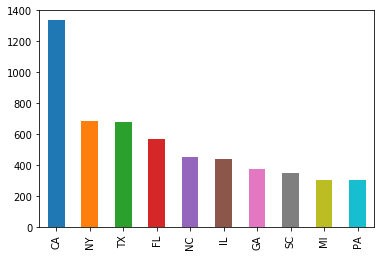

In [624]:
df.school_state.value_counts().head(10).plot(kind = 'bar')

In [520]:
df.groupby('year').school_state.count()

year
2016    7271
2017    2729
Name: school_state, dtype: int64

In [529]:
# How Will Month Look Like?

In [ ]:
v

#### Vectorize Text

In [561]:
text = df['project_essay_1']

X = text
y = df.project_is_approved

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)



In [562]:
def accuracy_test(vect, weights = {1: 1, 0: 1}):
    X_train_dtm = vect.fit_transform(X_train)
    #print(('Features: ', X_train_dtm.shape[1]))
    X_test_dtm = vect.transform(X_test)
    nb = RandomForestClassifier(class_weight = weights)
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    return nb,  metrics.accuracy_score(y_test, y_pred_class) , X_test_dtm

In [563]:
vect = CountVectorizer()
X_train_count = vect.fit_transform(X_train)
pd.DataFrame(X_train_count.toarray(), columns=vect.get_feature_names()).head()

,00,000,00am,00pm,02,03,049,05,10,100,...,zombie,zone,zoned,zones,zoo,zooming,zoos,zuckerberg,àll,سلام
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [564]:
model, accuracy, transformed = accuracy_test(vect)

/Users/fernandohidalgo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [565]:
## Below Accuracy
accuracy

0.8348

In [567]:
pd.DataFrame({'feature': vect.get_feature_names(), 
              'importance': model.feature_importances_}).sort_values(by='importance', ascending=False).head(10)

,feature,importance
11355,students,0.004562
10403,school,0.004350
815,and,0.004075
12921,with,0.003512
8318,of,0.003474
11939,to,0.003102
11782,their,0.002999
8360,on,0.002896
6628,learning,0.002877
947,are,0.002873


### Remove Stop Words & Add Weights

In [575]:
df.columns

Index(['project_is_approved', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_essay_1', 'teacher_number_of_previously_posted_projects',
       'year'],
      dtype='object')

In [577]:
df.project_is_approved.value_counts()

1    8510
0    1490
Name: project_is_approved, dtype: int64

In [579]:
8510./1490

5.7114093959731544

In [598]:
vect = CountVectorizer(stop_words='english')

model, accuracy, transformed = accuracy_test(vect, {1: 1,0: 6})

/Users/fernandohidalgo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [599]:
accuracy

0.842

### Lemmatize

In [600]:
def split_into_lemmas(text):
    text = str(text).lower()
    words = TextBlob(text).words
    return [word.lemmatize() for word in words]

In [603]:
vect = CountVectorizer(analyzer=split_into_lemmas, stop_words='english')
model, accuracy, transformed = accuracy_test(vect, {1: 1,0: 6})

/Users/fernandohidalgo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [604]:
accuracy

0.84

### Try TFIDF

In [605]:
vect = TfidfVectorizer(analyzer=split_into_lemmas, stop_words='english')
model, accuracy, transformed = accuracy_test(vect, {1: 1,0: 6})

/Users/fernandohidalgo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [651]:
accuracy

0.8376

### You Can Try Min_df and Max_df

### Add Other Columns Once You Pick The Best Way to Vectorize The Text

In [608]:
df.head()

,project_is_approved,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_essay_1,teacher_number_of_previously_posted_projects,year
0,1,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Most of my kindergarten students come from low...,26,2016
1,0,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,Our elementary school is a culturally rich sch...,1,2017
2,1,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,5,2017
3,0,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,My students are the greatest students but are ...,16,2016
4,1,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,My students are athletes and students who are ...,42,2016


### Get Dummy Variables

In [636]:
dummies = pd.get_dummies(df[[ 'teacher_prefix','project_grade_category' ] ])

In [637]:
df = pd.concat([df, dummies], axis=1)

In [638]:
df.head()

,project_is_approved,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_essay_1,teacher_number_of_previously_posted_projects,teacher_prefix_Dr.,teacher_prefix_Mr.,teacher_prefix_Mrs.,teacher_prefix_Ms.,teacher_prefix_Teacher,project_grade_category_Grades 3-5,project_grade_category_Grades 6-8,project_grade_category_Grades 9-12,project_grade_category_Grades PreK-2
0,1,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Most of my kindergarten students come from low...,26,0,0,0,1,0,0,0,0,1
1,0,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,Our elementary school is a culturally rich sch...,1,0,0,1,0,0,1,0,0,0
2,1,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,5,0,0,0,1,0,1,0,0,0
3,0,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,My students are the greatest students but are ...,16,0,1,0,0,0,1,0,0,0
4,1,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,My students are athletes and students who are ...,42,0,1,0,0,0,0,1,0,0


In [643]:
X = df[['project_essay_1'] + dummies.columns.tolist() ]
y = df.project_is_approved

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Vectorize The Text

In [672]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as stop_words


In [673]:
vect = CountVectorizer(stop_words=list(stop_words), analyzer=split_into_lemmas)
X_train_dtm = vect.fit_transform(X_train.project_essay_1)
X_test_dtm = vect.transform(X_test.project_essay_1)

### Combine The Features and Text

In [674]:
# Training 
extra = sp.sparse.csr_matrix(X_train.drop('project_essay_1', axis=1).astype(float))
X_train_dtm_extra = sp.sparse.hstack((X_train_dtm, extra))

#Test Set
extra = sp.sparse.csr_matrix(X_test.drop('project_essay_1', axis=1).astype(float))
X_test_dtm_extra = sp.sparse.hstack((X_test_dtm, extra))

## Classificiation 

In [675]:
rf = RandomForestClassifier()
rf.fit(X_train_dtm_extra, y_train)
y_pred_class = rf.predict(X_test_dtm_extra)
print((metrics.accuracy_score(y_test, y_pred_class)))

/Users/fernandohidalgo/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8388


In [669]:
null_accuracy

0.851

### In this case the text may not be predictive, there might other features that are more important